# 2. 머신러닝 프로젝트 처음부터 끝까지

**기본 설정**

파이썬 3.7 이상을 요구한다.

In [ ]:
import sys
assert sys.version_info >= (3, 7)

사이킷런 1.0.1 이상을 요구한다.

In [ ]:
import sklearn
assert sklearn.__version__ >= "1.0.1"

랜덤 시드 지정은 무작위성을 이용하는 머신러닝 코드를 실행할 때 매번 동일한 결과를 얻기 위해 사용된다.

In [ ]:
import numpy as np

np.random.seed(42)

## 2.1. 실전 데이터 활용

## 2.2. 큰 그림 그리기

## 2.3. 데이터 구하기

캘리포니아 주의 구역별 주택 중위가격을 예측하는 모델을 훈련시키려 한다.
이를 위해 먼저 데이터를 다운로드하고 적재한다.

### 데이터 다운로드

아래 코드의 `load_housing_data()` 함수는 지정된 깃허브 리포지토리에 압축파일로 저장되어 있는 캘리포니아 주택가격 데이터를 다운로드한 후에 Pandas 데이터프레임으로 변환하여 반환한다. 따라서 `housing` 변수는 캘리포니아 주택가격 데이터를 담고 있는 데이터프레임을 가리킨다.

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")                      # 파일 저장 경로. 파일명 함께 지정.
    if not tarball_path.is_file():                                   # 아직 다운로드하지 않은 경우
        Path("datasets").mkdir(parents=True, exist_ok=True)          # 폴더 생성
        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # 파일 다운로드
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:          # tgz 파일 압축 풀기
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))         # 압축 풀린 csv 파일 불러오기

housing = load_housing_data()

## 2.4. 데이터 탐색과 시각화

### 2.4.1. 데이터프레임과 데이터 탐색

**`head()` 메서드: 데이터프레임에 포함된 처음 5 개의 샘플 확인**

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**`info()` 메서드: 데이터셋 정보 요약**

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**범주형 특성 탐색: `value_counts()` 메서드**

`object`를 자료형(`Dtype`)으로 갖는 `ocean_procimity`(해안 근접도) 특성은 범주형 특성이다.

In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


**수치형 특성 탐색: `describe()` 메서드**

나머지 특성은 모두 수치형 특성이다.

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**그래프 기본 설정**

다음은 이미지에 포함된 폰트 크기를 설정한다.

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

이지를 저장할 폴더를
현재 디렉토리 아래의 `images/end_to_end_project` 디렉토리로 지정한다.

In [ ]:
# 이미지 파일 저장 경로

IMAGES_PATH = Path() / "images" / "end_to_end_project" # 이미지 파일 저장 디렉토리 지정
IMAGES_PATH.mkdir(parents=True, exist_ok=True)         # 디렉토리 생성

**수치형 특성별 히스토그램**

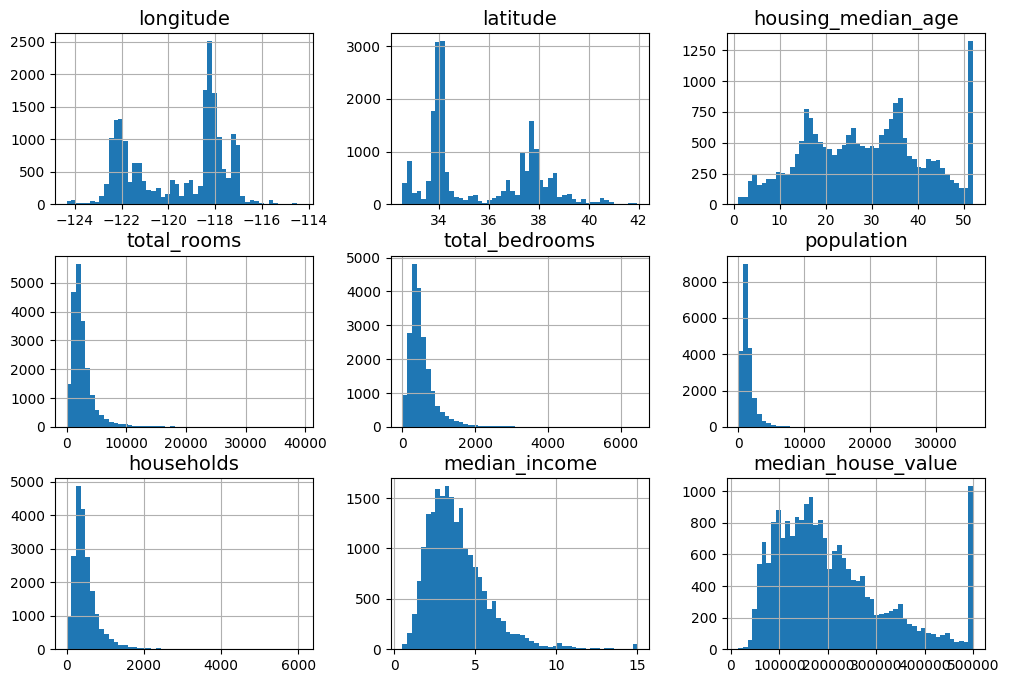

In [ ]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

### 2.4.2. 훈련셋과 테스트셋

훈련셋과 테스트셋을 구분하기 위해 `train_test_split()` 함수를 이용한다.

In [ ]:
from sklearn.model_selection import train_test_split

무작위로 데이터의 20% 정도를 테스트셋으로 지정할 수 있다.

```python
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
```

하지만 여기서는 소득 계층을 고려하면서 훈련셋과 테스트셋을 분류한다.

**계층 샘플링**

계층 샘플링을 위해 대부분 구역의 중위소득이 1.5 ~ 6.0, 즉 15,000 달러에서 60,000 달러 사이라는 사실에 주목하고 소득 구간을 아래 5개로 구분한다.

```python
[0, 1.5, 3.0, 4.6, 6.0, np,inf]
```

<Axes: >

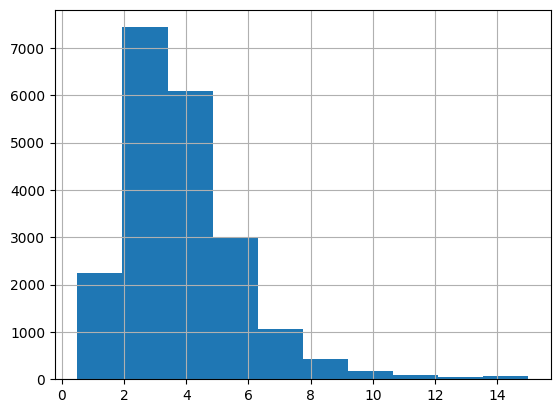

In [ ]:
housing['median_income'].hist()

소득 구간을 새로운 범주형 특성으로 추가한다.

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


소득 구간별 히스트로그램은 다음과 같다.

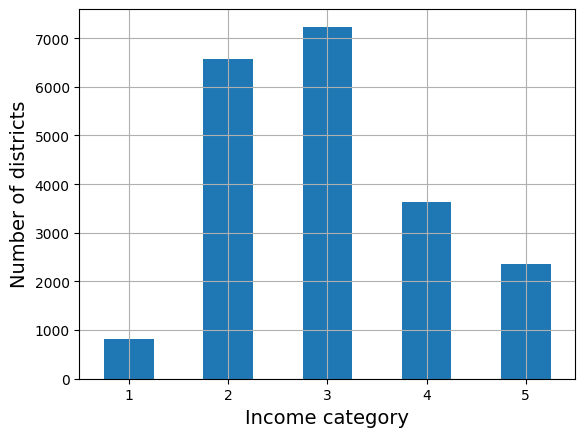

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

소득을 기준으로 계층 샘플링을 진행한다.

- `stratify=housing["income_cat"]` 키워드 인자 활용

In [ ]:
strat_train_set, strat_test_set = train_test_split(housing,
                                                   test_size=0.2,
                                                   stratify=housing["income_cat"],
                                                   random_state=42)

계층 샘플링은 모집단의 비율을 거의 그대로 유지하지만
무작위 추출은 비율이 좀 더 많이 달라진다.

아래 함수는 데이터셋에 포함된 소득 구간별 크기 비율을 계산한다.

In [ ]:
# 소득 구간별 비율 계산
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

계층 샘플링의 정확도를 평가하기 위해 무작위 샘플링 결과를 이용한다.

In [ ]:
# 비교 대상: 무작위 샘플링
train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42)

계층 샘플링과 무작위 샘플링의 결과를 비교한다.

In [ ]:
compare_props = pd.DataFrame({"전체(%)": income_cat_proportions(housing),
                              "계층 샘플링(%)": income_cat_proportions(strat_test_set),
                              "무작위 샘플링(%)": income_cat_proportions(test_set)})
compare_props.sort_index()

compare_props.index.name = "소득 구간"
compare_props["계층 샘플링 오류율(%)"] = (compare_props["계층 샘플링(%)"] /
                                          compare_props["전체(%)"] - 1)
compare_props["무작위 샘플링 오류율(%)"] = (compare_props["무작위 샘플링(%)"] /
                                            compare_props["전체(%)"] - 1)

(compare_props * 100).round(2)

,전체(%),계층 샘플링(%),무작위 샘플링(%),계층 샘플링 오류율(%),무작위 샘플링 오류율(%)
소득 구간,,,,,
3,35.06,35.05,34.52,-0.01,-1.53
2,31.88,31.88,30.74,-0.02,-3.59
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63
1,3.98,4.00,4.24,0.36,6.45


**데이터 되돌리기**

계층 샘플링을 이용하여
훈련셋과 테스트셋을 구분하기 위해 사용된 `income_cat` 특성은
모델 훈련에 필요없기에 삭제한다.

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 2.4.3. 데이터 시각화

훈련셋만을 대상으로 탐색과 시각화를 적용한다.
먼저 훈련셋 원본을 그대로 두고 복사해서 사용한다.

In [ ]:
housing = strat_train_set.copy()

**지리적 데이터 시각화**

* `grid` 키워드 인자 활용

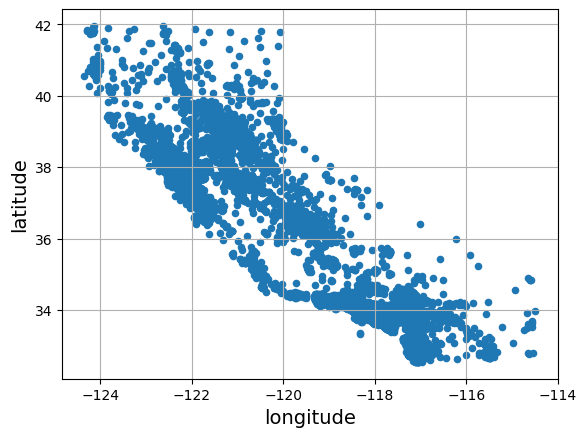

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

* `alpha` 키워드 인자 활용: 투명도를 조절하여 구역이 밀집되어 모여있는 정도를 보다 선명하게 보여줌.

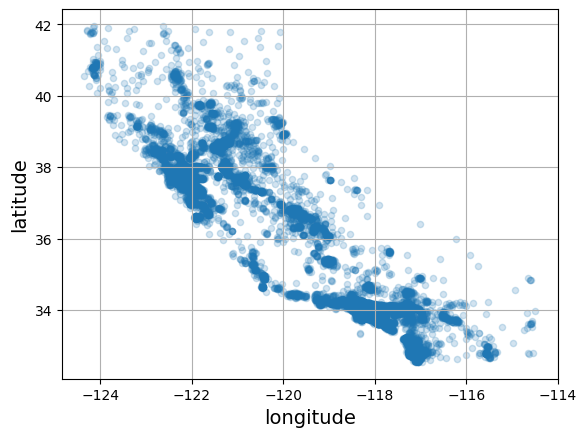

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

* 주택 중위가격을 색상으로 활용하기
    * `s=housing["population"] / 100`: 구역별 인구수에 비례해서 원의 크기 지정
    * `c="median_house_value"`: 주택 중위가격을 색상 지정에 이용
    * ` cmap="jet"`: [colormap 지정](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
    * `sharex=False` : x-축의 눈금 값과 범례를 표시하지 못하는 버그 수정 용도이며 임시 방편 해결책임
        참고: https://github.com/pandas-dev/pandas/issues/10611

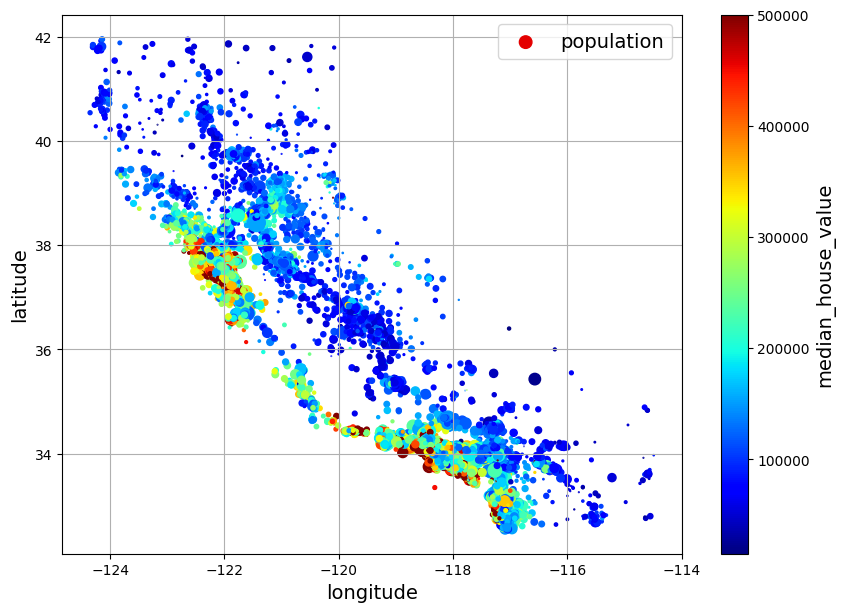

In [ ]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value",
             cmap="jet",
             colorbar=True,
             legend=True,
             sharex=False,
             figsize=(10, 7))
plt.show()

* 캘리포니아 지도와 합치기

In [ ]:
# 캘리포니아 지도 다운로드
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

지도 표기에 사용되는 특성 이름을 수정한다.

In [ ]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})

다운로드한 캘리포니아 지도와 위도/경도를 이용한 산포도를 함께 그린다.

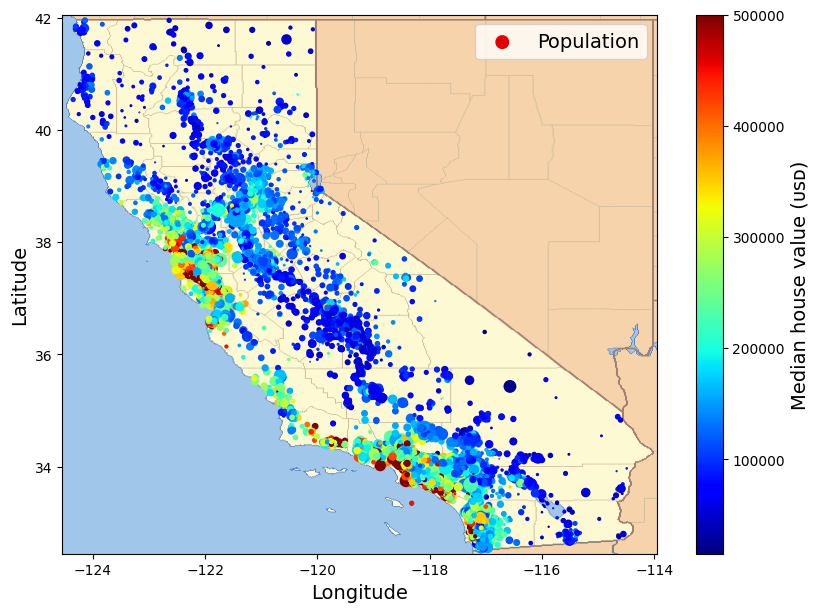

In [ ]:
# 위도/경도를 이용한 구역별 인구 산포도
housing_renamed.plot(kind="scatter",
                     x="Longitude",
                     y="Latitude",
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Median house value (ᴜsᴅ)",
                     cmap="jet",
                     colorbar=True,
                     legend=True,
                     sharex=False,
                     figsize=(10, 7))

# 다운로드된 캘리포티아 지도
california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05  # x축, y축 눈금
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

**상관관계**

* 모든 수치형 특성 간의 표준 상관계수 계산

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


* 주택 중위가격과 다른 특성 간의 상관관계 확인
* `sort_values()` 메서드: 값을 기준으로 정렬하기

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


* 특성들 사이의 상관관계를 나타내는 산점도

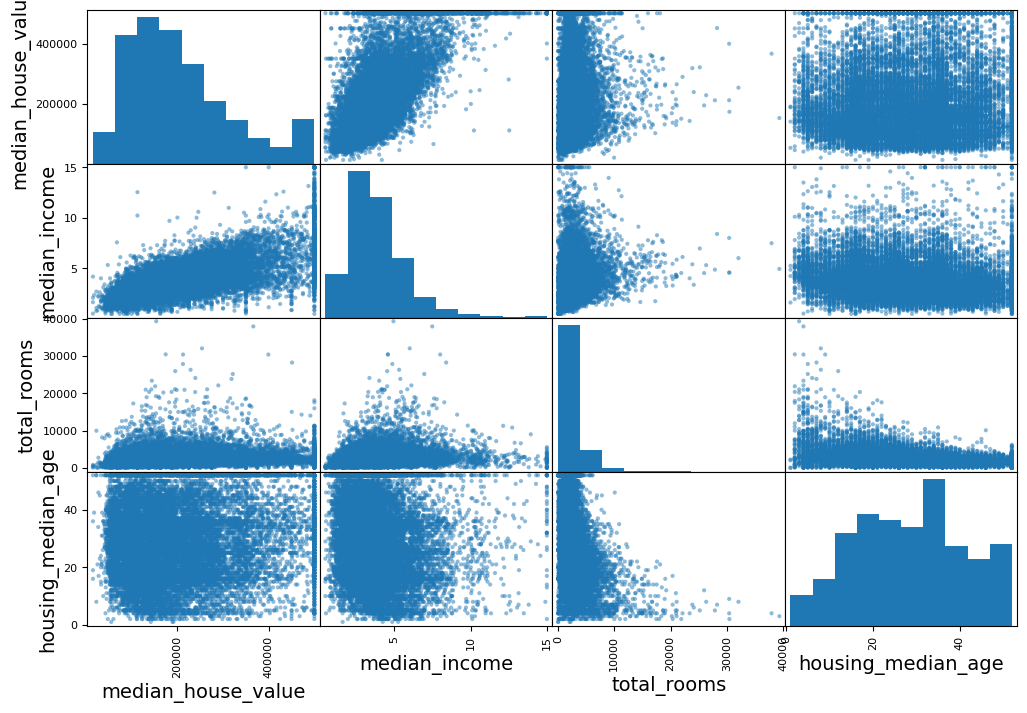

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

* 중위소득 대 주택 중위가격 산점도

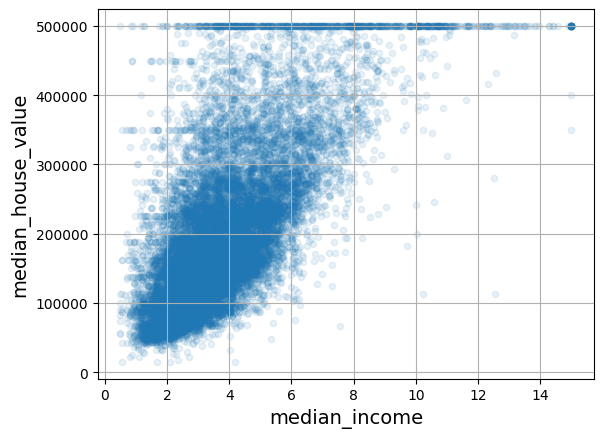

In [ ]:
housing.plot(kind="scatter",
             x="median_income",
             y="median_house_value",
             alpha=0.1,
             grid=True)
plt.show()

## 2.5. 데이터 준비: 정제와 전처리

**데이터 정제**

`total_bedrooms` 특성에 존재하는 결측치 처리법을 결정한다.

- 결측치가 있는 샘플의 인덱스 확인 마스크(mask)

In [ ]:
null_rows_idx = housing.isnull().any(axis=1)

In [ ]:
null_rows_idx

,0
13096,False
14973,False
3785,False
14689,False
20507,False
...,...
14207,False
13105,False
19301,False
19121,False


결측치가 있는 샘플을 확인한다.

In [ ]:
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,85900.0,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,150400.0,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,161200.0,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,500001.0,<1H OCEAN


총 168개의 샘플에 결측치가 존재한다.

In [ ]:
housing.loc[null_rows_idx].shape

(168, 10)

결측치 처리 방법은 일반적으로 다음 세 가지 중에 하나를 사용한다.

* 방법 1: 결측치 특성 포함 샘플 삭제

    ```
    housing.dropna(subset=["total_bedrooms"], inplace=True)  # 옵션 1
    ```

* 방법 2: 결측치를 포함한 특성 삭제

    ```
    housing.drop("total_bedrooms", axis=1, inplace=True)  # 옵션 2
    ```

* 방법 3: 결측치를 해당 특성의 중앙값/평균값 등으로 대체. 아래 코드는 중앙값(median) 활용

    ```
    # 중앙값으로 대체
    median = housing["total_bedrooms"].median()
    housing["total_bedrooms"].fillna(median, inplace=True)  # 옵션 3
    ```

### 2.5.1. 사이킷런 API


사이킷런의 API는 일반적으로 다음 세 클래스의 인스턴스로 생성된다.

추정기(estimator)

- fit() 메서드를 지원하는 클래스의 인스턴스

- 일반적으로 변환기와 예측기 둘 중의 하나임.

변환기(transformer)

- fit() 메서드와 transform() 메서드를 함께 지원하는 클래스의 인스턴스

- 일반적으로 데이터 정제와 전처리 과정에서 주로 사용됨.

- fit() 메서드: 데이터 변환에 필요한 정보 계산

- transform() 메서드: 데이터 변환 실행

- fit_transform() 메서드도 함께 지원: fit() 메서드와 transform() 메서드를 연속으로 호출.

예측기(predictor)

- fit() 메서드와 predict() 메서드를 함께 지원하는 클래스의 인스턴스

- 일반적으로 모델이라 불림.

- fit() 메서드: 모델의 훈련 관장

- predict() 메서드: 모델의 훈련이 종료 된 후 실전에서 예측값을 계산할 활용

- predict() 메서드가 예측한 값의 성능을 측정하는 score() 메서드도 일반적으로 함께 지원됨.

- 일부 예측기는 예측값의 신뢰도를 평가하는 기능도 함께 제공.

### 2.5.2. SimpleImputer 변환기: 결측치 처리

`SimpleImputer` 변환기를 활용하면 방법 3을 쉽게 처리할 수 있다.
아래 코드는 특성별 중앙값을 계산해서 모든 결측치를 중앙값으로 대체하는 변환기를 선언한다.

- `strategy` 속성: 결측치를 대체할 방식을 지정. 평균('mean'), 중앙값('median'), 최빈값('most_frequent'), 상숫값('constant') 중 하나 선택

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

중앙값이 수치형 특성에서만 계산될 수 있기 때문에 수치형 특성만을 대상으로 `SimpleImputer` 변환기를 적용한다.

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])
# housing_num = housing.drop("ocean_proximity", axis = 1)

`SimpleImputer` 변환기의 `fit()` 메서드는 `strategy` 속성에 따라 계산된 특성별 평균값, 중앙값, 최빈값 등을 변환기 자체의 `statistics_` 속성에 저장한다.

In [ ]:
imputer.fit(housing_num)

imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1250e+03,  4.3400e+02,
        1.1670e+03,  4.0800e+02,  3.5385e+00,  1.7920e+05])

이제 `transform()` 메서드를 실행하여 수치형 특성에 포함된 결측치를 모두 특성별 중앙값으로 대체한다.
변환된 데이터셋은 **넘파이 어레이** 자료형으로 반환된다.

In [ ]:
X = imputer.transform(housing_num)
X

array([[-1.22420e+02,  3.78000e+01,  5.20000e+01, ...,  1.03400e+03,
         2.09870e+00,  4.58300e+05],
       [-1.18380e+02,  3.41400e+01,  4.00000e+01, ...,  3.57000e+02,
         6.08760e+00,  4.83800e+05],
       [-1.21980e+02,  3.83600e+01,  3.30000e+01, ...,  2.03000e+02,
         2.43300e+00,  1.01700e+05],
       ...,
       [-1.17060e+02,  3.25900e+01,  1.30000e+01, ...,  7.60000e+02,
         4.06160e+00,  1.48800e+05],
       [-1.18400e+02,  3.40600e+01,  3.70000e+01, ...,  8.38000e+02,
         4.14550e+00,  5.00001e+05],
       [-1.22410e+02,  3.76600e+01,  4.40000e+01, ...,  2.12000e+02,
         3.28330e+00,  2.33300e+05]])

**참고:** `fit()`과 `transform()` 메서드를 연속 적용하는
`fit_transform()` 메서드를 실행해도 동일한 결과를 얻는다.

In [ ]:
X = imputer.fit_transform(housing_num)
X

array([[-1.22420e+02,  3.78000e+01,  5.20000e+01, ...,  1.03400e+03,
         2.09870e+00,  4.58300e+05],
       [-1.18380e+02,  3.41400e+01,  4.00000e+01, ...,  3.57000e+02,
         6.08760e+00,  4.83800e+05],
       [-1.21980e+02,  3.83600e+01,  3.30000e+01, ...,  2.03000e+02,
         2.43300e+00,  1.01700e+05],
       ...,
       [-1.17060e+02,  3.25900e+01,  1.30000e+01, ...,  7.60000e+02,
         4.06160e+00,  1.48800e+05],
       [-1.18400e+02,  3.40600e+01,  3.70000e+01, ...,  8.38000e+02,
         4.14550e+00,  5.00001e+05],
       [-1.22410e+02,  3.76600e+01,  4.40000e+01, ...,  2.12000e+02,
         3.28330e+00,  2.33300e+05]])

모델 훈련에 필수사항은 아니지만 편의상 팬다스의 데이터프레임을 이용하면 보다 보기가 좋다.
데이터프레임으로 형변환시키기 위해 특성 이름을 활용한다.

이제 `total_bedrooms` 특성에 포함된 5개의 결측치가 중앙값 434.0으로 채워진 것을 확인할 수 있다.



In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [ ]:
# total_bedrooms 특성에 결측치를 포함했던 5개 샘플
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,85900.0
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,150400.0
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,161200.0
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,410700.0
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,500001.0


### 2.5.3. 입력 데이터셋과 타깃 데이터셋

주택 중위가격을 타깃값(레이블)으로 지정한다.

- `housing`: 주택 중위가격 특성을 제외한 데이터를
    지도 학습에 필요한 입력 데이터셋으로 사용하기 위해
    변수가 가리키는 값을 변경
- `housing_labels`: 주택 중위가격은 지도 학습의 타깃으로 활용

In [ ]:
# 입력 데이터셋 지정
housing = strat_train_set.drop("median_house_value", axis=1)
# 타깃 데이터셋 지정
housing_labels = strat_train_set["median_house_value"].copy()

### 2.5.4. OneHotEncoder 변환기: 범주형 특성 전처리

해안 근접도(`ocean_proximity`)는 문자열을 사용한다.

In [ ]:
housing_cat = housing[["ocean_proximity"]]

**`OneHotEncoder` 클래스**

- 범주 수 만큼의 새로운 특성 추가
- 해당되는 범주와 관련된 특성값은 1, 나머지 특성값은 0.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

원-핫-인코딩 변환기의 `transform()` 메서드는 기본적으로
**희소 행렬**<font size="2">sparse matrix</font>을 반환한다.

In [ ]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

`toarray()` 메서드가 희소 행렬을 밀집 배열<font size="2">dene matrix</font>로 변환한다.

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

처음부터 `OneHotEncoder` 변환기의 `sparse_output=False` 하이퍼파라미터를 사용하면 밀집 행렬이 생성된다.

In [ ]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

**변환기의 속성과 메서드**

변환에 사용된 범주들은 변환기의 `categories_` 속성에 저장된다.

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

변환된 특성의 이름은 변환기의 `feature_names_in_` 속성에 저징된다.

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

변환된 각 특성들에 대한 새로운 특성명은 `get_feature_names_out()` 메서드가 확인해준다.

In [ ]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

변환기의 반환값은 기본적으로 넘파이 어레이 자료형이다.
따라서 훈련에 반드시 필요하지는 않지만
변환된 데이터셋을 특성명을 함께 표현하고 확인하고 싶을 때
데이터프레임으로 표현하면 좋다.
이를 위해 새로 생성된 특성명과 기존의 인덱스를 이용한다.

In [ ]:
housing_cat_onehot = pd.DataFrame(housing_cat_1hot,
                                  columns=cat_encoder.get_feature_names_out(),
                                  index=housing_cat.index)

housing_cat_onehot

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


### 2.5.5. MinMaxScaler와 StandardScaler 변환기: 수치형 특성 스케일링

* 정규화: min-max 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

* 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

### 2.5.6. `FunctionTransformer` 변환기

`FunctionTransformer`는 `fit()` 메서드를 사용하지 않고 바로
`transform()` 메서드를 적용하는 변환기를 생성할 때 활용한다.

**로그 변환기**

구역별 인구 특성 등 한쪽으로 치우친 특성에 로그 함수를 적용한다.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, feature_names_out="one-to-one")

**비율 계산 변환기**

가구당 인원, 가구당 방 수, 침실 비율 등 비율과 관련된 새로운 특성을 생성할 때 사용한다.

아래 코드는 1번 특성을 기준으로 0번 특성의 비율을 값으로 갖는 특성을 생성하는 변환기를 정의한다.

In [ ]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])

### 2.5.7. 군집 변환기: 사용자 정의 변환기

군집 유사도 적용 변환기는 직접 구현해야 한다.
단, 변환기를 정의할 때 `BaseEstimator` 클래스와 `TransformerMixin` 클래스를 상속하도록 함에 주의한다.
그래야 변환기의 기본 기능을 모두 갖추게 된다.

**주의사항:** 아래 코드를 군집화 모델인 KMeans를 활용한다.
하지만 관련 지식이 없어 이해하지 못해도 상관 없다.
여기서는 사용자가 임의로 변환기를 생성할 수 있다는 사실만 기억해도 된다.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    # 군집화
    def fit(self, X, y=None, sample_weight=None): # sample_weight: 샘플별로 가중치 적용
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # fit() 함수의 반환값은 언제나 self!

    # fit() 이 찾아낸 군집별 유사도를 새로운 특성으로 추가
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    # 새롭게 생성된 특성 이름
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

구역별 중앙 주택 가격을 샘플 가중치로 지정한 후에 10개의 군집을 생성한다.
즉, 비싼 주택 가격을 갖는 구역을 중요시하며 따라서 센트로이드로 지정될 가능성을 높인다.

`transform()` 메서드는 각 샘플과 10개의 센트로이드 사이의 유사도 점수를 계산한다.
계산된 유사도 점수는 새로운 10개의 특성으로 추가해서 캘리포니아 구역별 주택 가격 예측에 활용한다.

In [ ]:
housing['median_income']

,median_income
13096,2.0987
14973,6.0876
3785,2.4330
14689,2.2618
20507,3.5292
...,...
14207,4.7105
13105,2.5733
19301,4.0616
19121,4.1455


In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing['median_income'])

처음 5 개 샘플과 각 센트로이드에 대한 유사도 점수는 다음과 같다.

In [ ]:
similarities[:5].round(2)

array([[0.61, 0.  , 0.  , 0.97, 0.08, 0.  , 0.  , 0.  , 0.14, 0.  ],
       [0.  , 0.63, 1.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.1 ],
       [0.31, 0.  , 0.  , 0.74, 0.45, 0.  , 0.  , 0.01, 0.29, 0.  ],
       [0.  , 0.65, 0.2 , 0.  , 0.  , 0.  , 0.52, 0.  , 0.  , 0.  ],
       [0.  , 0.85, 0.87, 0.  , 0.  , 0.  , 0.13, 0.  , 0.  , 0.03]])

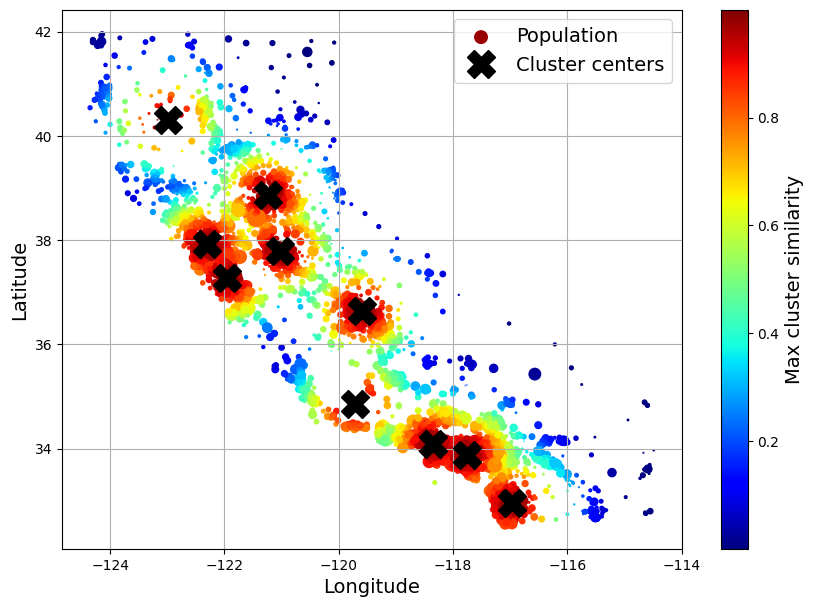

In [ ]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

## 2.6. 파이프라인

### 2.6.1. `Pipeline` 클래스

**수치형 특성 변환 기본 파이프라인**

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

**`make_pipeline()` 함수 활용**

`make_pipeline()` 함수를 이용할 수도 있다.
단, 각 변환기의 이름은 자동으로 생성된다.

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

**파이프라인 활용 예제**

파이프라인 활용법은 변환기/예측기 활용법과 동일하다.

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

모델 훈련에 필요한 건 아니지만
변환된 넘파이 어레이를 데이터프레임으로 변환하기 위해서는
행과 칸의 이름을 지정하면 된다.
특성명은 파이프라인의 `get_feature_names_out()` 메서드로 확인한다.
그런데 파이프라인에 포함된 두 변환기 모두 기존의 특성명을 그대로 유지한다.

In [ ]:
num_pipeline.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [ ]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared,
                                       columns=num_pipeline.get_feature_names_out(),
                                       index=housing_num.index)

df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,2.185112
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,2.406254
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,-0.907406
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,-0.955971
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,1.348242


### 2.6.2. `ColumnTransformer` 클래스

특성별로 파이프라인을 지정할 수 있다.

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# 범주형 특성 파이프라인
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# 수치형과 범주형을 구별하여 파이프라인 구성
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

**`make_column_transformer()` 함수 활용**

지정된 자료형을 사용하는 특성들만을 뽑아주는 make_column_selector() 함수를 유용하게 활용할 수 있다.
`make_column_selector()` 함수는 파이프라인을 적용할 특성을 선택하는 데 사용한다.


In [ ]:
from sklearn.compose import make_column_selector

preprocessing = ColumnTransformer([("num", num_pipeline, make_column_selector(dtype_include=np.number)),
                                   ("cat", cat_pipeline, make_column_selector(dtype_include=object))])

사용법은 하나의 변환기를 사용법과 동일하다.

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

변환된 각 특성에 대해 새로운 이름이 지정된다.
특성명은 각 파이프라인의 이름과 기존의 특성명이 `__`로 연결되는
방식으로 지어진다.

In [ ]:
preprocessing.get_feature_names_out()

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN'], dtype=object)

`make_column_transformer()` 함수는 `make_pipeline()` 함수와 유사한 방식으로 작동하며
`ColumnTransformer` 객체를 생성한다.

In [ ]:
from sklearn.compose import make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),     # np.object 대신 object 사용
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

특성명은 여전히 각 파이프라인의 이름과 기존의 특성명이 `__`로 연결되는
방식으로 지어진다.
다만 특성명을 지정하지 않았기에 `pipeline-1`, `pipeline-2` 등이 사용된다.

In [ ]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

변환기의 반환값은 기본적으로 넘파이 어레이 자료형이다.
훈련을 위해 필요하지는 않지만 데이터프레임으로 예쁘게 출력하면 다음과 같다.

In [ ]:
# 훈련을 위해 반드시 필요한 코드는 아님

housing_prepared_fr = pd.DataFrame(housing_prepared,
                                   columns=preprocessing.get_feature_names_out(),
                                   index=housing.index)

housing_prepared_fr.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


### 2.6.3. 캘리포니아 데이터셋 변환 파이프라인

지금까지 소개한 변환기와 파이프라인을 정리하면 다음과 같다.

(1) 비율 변환기

In [ ]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]] # 1번 특성에 대한 0번 특성의 비율율

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # 새로 생성되는 특성 이름

ratio_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())



(2) 로그 변환기

In [ ]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

(3) 군집 변환기

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

(4) 기본 변환기

In [ ]:
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

**종합**

In [ ]:
# 정제와 전처리 과정 전체를 아우루는 변환 파이프라인
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline, ["total_bedrooms", "total_rooms"]),      # 침실 비율
        ("rooms_per_house", ratio_pipeline, ["total_rooms", "households"]),   # 가구당 방 수
        ("people_per_house", ratio_pipeline, ["population", "households"]),   # 가구당 인원
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", # 로그 변환
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),                    # 구역별 군집 정보
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),    # 범주형 특성 전처리
    ],
    remainder=default_num_pipeline)                                           # 주택 중위연령(housing_median_age) 대상

정제와 전처리를 동시해 진행한 결과는 다음과 같다.

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

변환된 입력 데이터셋은 총 24개의 특성을 갖는다.

In [ ]:
housing_prepared.shape

(16512, 24)

특성 이름은 다음과 같다.

In [ ]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

변환된 입력 데이터셋은 다음과 같다.

In [ ]:
housing_prepared

array([[ 1.84662439, -0.86602737, -0.33020372, ...,  1.        ,
         0.        ,  1.86111875],
       [-0.5081207 ,  0.0245495 , -0.25361631, ...,  0.        ,
         0.        ,  0.90762971],
       [-0.20215476, -0.04119332, -0.05104091, ...,  0.        ,
         0.        ,  0.35142777],
       ...,
       [-0.24249175, -0.10998748,  0.15854151, ...,  0.        ,
         1.        , -1.23772062],
       [ 0.25977479, -0.36093745, -0.21033248, ...,  0.        ,
         0.        ,  0.66925745],
       [ 3.61270996, -1.32397227,  0.04958379, ...,  0.        ,
         1.        ,  1.22545939]])

훈련을 위해 필요하지는 않지만 데이터프레임으로 변환하면
변환된 입력 데이터셋을 보다 쉽게 파악할 수 있다.

In [ ]:
housing_prepared_df = pd.DataFrame(housing_prepared,
                                   columns=preprocessing.get_feature_names_out(),
                                   index=housing.index)

housing_prepared_df.head()

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,8.708837e-08,9.712456e-01,...,7.114441e-04,3.070969e-17,1.314047e-01,5.740031e-01,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,1.181328e-01,9.738096e-14,...,3.045359e-27,5.437838e-01,1.735342e-09,2.275194e-10,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,2.295286e-08,7.457782e-01,...,4.750719e-03,1.605970e-17,2.744847e-01,2.839978e-01,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,4.618947e-04,3.873884e-20,...,2.916178e-35,7.405721e-01,2.243339e-14,4.218649e-16,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,3.166634e-02,7.905346e-16,...,2.843975e-30,7.501278e-01,2.890866e-11,3.710912e-12,0.0,0.0,0.0,0.0,1.0,0.589800


## 2.7. 모델 선택과 훈련

### 2.7.1. 모델 훈련과 평가

이어서 소개되는 모든 모델은 앞서 설명한 전처리 과정과 함께 하나의 파이프라인으로 묶여서 정의된다. 이는 테스트셋과 미래의 모든 입력 데이터셋에 대해서도 전처리를 별도로 신경쓸 필요가 없게 해준다.

**선형 회귀 모델**

* 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e2...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e2da1cab4d0>)])),
                ('linearregression', LinearRegression())])

* 예측

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = 10의 자리에서 반올림하기기

array([242800., 375900., 127500.,  99400., 324600.])

실제 주택 중위가격은 다음과 같으며, 예측값과 오차가 꽤 난다.

In [ ]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

오차를 계산해보자.

In [ ]:
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-47.0%, -22.3%, 25.4%, 3.4%, -10.3%


예측값의 RMSE가 68647 정도로 많이 높다.
과소 적합이 발생하였으며 이는 선형회귀 모델이 적절하지 않음을 의미한다.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68647.95686706658

**결정트리 회귀 모델**

* 훈련

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e2...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e2da1cab4d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

* 예측



RMSE가 0으로 나온다.
이는 결정트리 모델이 심하게 과대 적합되었음을 의미한다.
이런 모델은 전혀 의미가 없다.

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**램덤 포레스트 회귀 모델**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(n_estimators=100, random_state=42))

- 훈련

In [ ]:
forest_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e2...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e2da1cab4d0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

- 예측

RMSE가 결정트리보다는 높지만 선형회귀 모델 보다는 훨씬 낮다.

In [ ]:
housing_predictions = forest_reg.predict(housing)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

17521.565358779884

### 2.7.2. 교차 검증

**`cross_val_score()` 함수**

교차 검증을 이용하여 훈련 과정 중의 모델 성능 평가를 진행한다.
교차 검증은 경우에 따라 많은 시간을 요한다.

* 결정트리 모델에 대한 교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error",
                              cv=10)

`cv=10` 설정에 의해 10 개의 폴드를 사용하며 매번 RMSE를 측정한다.

In [ ]:
tree_rmses

array([64854.86006934, 63557.65500684, 65663.3837676 , 65453.91538918,
       64456.37635524, 66919.47216599, 66110.41040337, 68532.21066423,
       69530.30110106, 68591.25110456])

`pandas.Series` 로 변환하면 통계 정보를 쉽게 구할 수 있다.
결과가 이전에 하나의 결정트리 모델만 사용했을 때 보다 훨씬 나쁘다.

In [ ]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,66366.983603
std,1976.844743
min,63557.655007
25%,65004.623899
50%,65886.897085
75%,68129.026040
max,69530.301101


* 선형회귀 모델에 대한 교차 검증: 결정트리 모델의 교차검증 보다 약간 나쁨.

In [ ]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,69847.923224
std,4078.407329
min,65659.761079
25%,68088.799156
50%,68697.591463
75%,69800.966364
max,80685.254832


* 랜덤 포레스트 회귀 모델에 대한 교차 검증: 램덤 포레스트 모델에 교차 검증을 적용하면 보다 많은 시간이 걸린다.
하지만 결과적으로 랜덤 포레스트 회귀 모델의 성능이 보다 좋다.

In [ ]:
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,46938.209246
std,1018.397196
min,45522.649195
25%,46291.334639
50%,47021.703303
75%,47321.521991
max,49140.832210


결론적으로 교차 검증의 결과가 훈련셋에 대한 평가보다는 나쁘다. 따라서 모델이 훈련셋에 너무 특화되어 있다고 말할 수 있으며 이를 과대적합이라 한다.

## 2.8. 모델 미세 조정

### 2.8.1. 그리드 탐색

그리드 탐색에 사용될 모델을 전처리와 함께 지정한다.
파이프라인에 포함된 전처리와 예측기에 사용되는 하이퍼파라미터 중에서 미세조정에 사용될 하이퍼파라미터가 가질 수 있는 값들의 리스트를 지정한다.

총 15개의 하이퍼파라미터 조합에 대해 모델을 지정한 다음에
매번 3-겹 교차 검증을 실행하기에
아래 코드는 총 45번 훈련을 진행한다.

```
(3 * 3 + 2 * 3) * 3 = 45
```

아래 코드를 실행하면 컴퓨터 사양에 따라 몇 분 이상 걸릴 수 있다.

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
# 하아퍼파라미터 조합: 3*3 + 2*3 조합 확인
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],  # ClusterSimilarity 클래스 하이퍼파라미터: 군집 수
     'random_forest__max_features': [4, 6, 8]},     # 랜덤 포레스트 하이퍼파라미터
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

# 3-겹 교차 검증 활
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e2da1cab4d0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

**`full_pipeline.get_params().keys()`**

파이프라인에 포함된 변환기와 예측기의 하이퍼파라미터 전체를 확인할 수 있다.
예를 들어, 사용가능한 10개의 하이퍼파라미터는 다음과 같다.

In [ ]:
list(full_pipeline.get_params().keys())[:10]

['memory',
 'steps',
 'transform_input',
 'verbose',
 'preprocessing',
 'random_forest',
 'preprocessing__force_int_remainder_cols',
 'preprocessing__n_jobs',
 'preprocessing__remainder__memory',
 'preprocessing__remainder__steps']

예를 들어, 'preprocessing__geo__n_clusters' 가 포함되어 있음을 확인할 수 있다.

In [ ]:
'preprocessing__geo__n_clusters' in full_pipeline.get_params().keys()

True

**best_params_ 속성**

그리드 탐색을 통해 찾아낸 최적의 하이퍼파라미터 조합은 다음과 같다.

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

**best_estimator_ 속성**

그리드 탐색을 통해 찾아낸 최적의 모델은 다음과 같다.

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e2da1c...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e2da19ec310>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

**cv_results_ 속성 활용**

그리드 탐색 과정에서 훈련된 15개 모델 각각의 평가지표를 확인할 수 있다.
원래 사전 자료형으로 지정되며,
키(key)는 랜덤 포레스트 모델의 하이퍼파라미터와 각 모델의 훈련 성능과 관련된다.

사전을 데이터프레임으로 변환하면 보다 보기가 편하다.
데이터프레임의 칸은 사전 자료형의 키를 사용한다.

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)

In [ ]:
cv_res.shape

(15, 13)

In [ ]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.055755,0.344086,0.212521,0.016705,5,4,"{'preprocessing__geo__n_clusters': 5, 'random_...",-45906.876311,-46207.625427,-47370.575190,-46495.025643,631.164408,13
1,8.177491,0.355982,0.204252,0.011221,5,6,"{'preprocessing__geo__n_clusters': 5, 'random_...",-46516.356940,-46386.060179,-47468.984684,-46790.467268,482.724024,14
2,10.390020,0.304941,0.212917,0.022689,5,8,"{'preprocessing__geo__n_clusters': 5, 'random_...",-46918.850197,-46958.373053,-47862.409204,-47246.544151,435.781166,15
3,6.326453,0.327355,0.206358,0.013956,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44386.450165,-44489.854476,-45257.044394,-44711.116345,388.330777,7
4,8.518612,0.331783,0.227294,0.021292,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44578.615017,-44712.638159,-45550.355967,-44947.203048,429.988863,8


RMSE(`"mean_test_score"`)를 기준으로 내림차순으로 정렬한다.

In [ ]:
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,9.077489,0.384597,0.218704,0.024426,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43006.650208,-43683.244212,-44158.332131,-43616.075517,472.565014,1
13,11.872289,0.119874,0.215543,0.004168,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43696.807883,-44011.195266,-44819.026722,-44175.676624,472.676329,2
7,8.766662,0.283031,0.208983,0.013729,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44132.827198,-45226.940308,-44356.476185,639.295570,3
9,8.891646,0.243627,0.232906,0.029940,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44132.827198,-45226.940308,-44356.476185,639.295570,3
6,6.305077,0.280992,0.237669,0.026054,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44232.653866,-45100.371162,-44376.959735,541.452222,5


그리드 탐색에 사용된 하이퍼파라미터와 몇 개의 성능 측정값만 사용해보자.

In [ ]:
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features",
                 "split0_test_score",
                 "split1_test_score",
                 "split2_test_score",
                 "mean_test_score"]]
cv_res.head()

,param_preprocessing__geo__n_clusters,param_random_forest__max_features,split0_test_score,split1_test_score,split2_test_score,mean_test_score
12,15,6,-43006.650208,-43683.244212,-44158.332131,-43616.075517
13,15,8,-43696.807883,-44011.195266,-44819.026722,-44175.676624
7,10,6,-43709.661050,-44132.827198,-45226.940308,-44356.476185
9,10,6,-43709.661050,-44132.827198,-45226.940308,-44356.476185
6,10,4,-43797.854175,-44232.653866,-45100.371162,-44376.959735


하이퍼파라미터 및 성능 측정값의 이름을 보다 간단한 이름으로 변경해보자.

In [ ]:
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,-43006.650208,-43683.244212,-44158.332131,-43616.075517
13,15,8,-43696.807883,-44011.195266,-44819.026722,-44175.676624
7,10,6,-43709.661050,-44132.827198,-45226.940308,-44356.476185
9,10,6,-43709.661050,-44132.827198,-45226.940308,-44356.476185
6,10,4,-43797.854175,-44232.653866,-45100.371162,-44376.959735


RMSE 등 음의 값을 양의 값으로 변환한다.

**참고:** 성능은 RMSE를 이용하고 큰 값이 좋은 성능을 의미하도록 음수로 측정된다.
이를 되돌리는 것 뿐이다.

In [ ]:
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

<ipython-input-113-1e96a7539e2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)


,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43007,43683,44158,43616
13,15,8,43697,44011,44819,44176
7,10,6,43710,44133,45227,44356
9,10,6,43710,44133,45227,44356
6,10,4,43798,44233,45100,44377


### 2.8.2. 랜덤 탐색

아래 코드는 무작위로 선택한 10개의 하이퍼파라미터 조합에 대해 3-겹 교차 검증을 진행하기에 총 30(=10x3)번 훈련을 진행한다.
아래 코드는 컴퓨터 사양에 따라 몇 분 이상 걸릴 수 있다.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 하이퍼파라미터 탐색 공간 지정
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50), # ClusterSimilarity 클래스 하이퍼파라미터: 군집 수
                  'random_forest__max_features': randint(low=2, high=20)}

# 10개의 하이퍼파라미터 무작위 선택, 3-겹 교차 검증 활용
rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e2da3fc7990>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e2da3fca710>},
                   random_state=42, scoring='neg_root_mean_squared_error')

최적의 하이퍼파라미터조합은 다음과 같다.

- 군집수: 45개
- 최대 특성수: 9개

In [ ]:
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

훈련된 10개의 모델에 대한 정보는 다음과 같다.

In [ ]:
cv_res = pd.DataFrame(rnd_search.cv_results_)

# RMSE 기준 내림차순 정렬
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# 일부 특성만 대상으로 삼기
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols

# 점수를 양수로 변환
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41224,42385,42712,42107
8,32,7,41374,42579,43230,42394
0,41,16,42397,42640,43175,42738
5,42,4,41874,43348,43690,42971
2,23,8,42421,43138,43585,43048


### 2.8.3. 최적 모델 활용

In [ ]:
final_model = rnd_search.best_estimator_                                 # 최적의 모델
feature_importances = final_model["random_forest"].feature_importances_  # 특성별 상대적 중요도

특성 이름을 추가한 후 특성별 상대적 중요도를 기준으로 내림차순으로 정렬하면
`'log__median_income'` 특성이 주탁 가격을 예측할 때 가장 중요한 특성임을 확인해준다.

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.18883049114642353, 'log__median_income'),
 (0.07550690165952419, 'cat__ocean_proximity_INLAND'),
 (0.06427087748676082, 'bedrooms__ratio'),
 (0.0521695509969851, 'rooms_per_house__ratio'),
 (0.04664258696240615, 'people_per_house__ratio'),
 (0.04244311259449021, 'geo__Cluster 3 similarity'),
 (0.02329106317954673, 'geo__Cluster 17 similarity'),
 (0.022649484211911694, 'geo__Cluster 18 similarity'),
 (0.02197243576680579, 'geo__Cluster 22 similarity'),
 (0.01881537204558837, 'geo__Cluster 40 similarity'),
 (0.01766998676736003, 'geo__Cluster 10 similarity'),
 (0.01754694953848625, 'geo__Cluster 35 similarity'),
 (0.017274903717750808, 'geo__Cluster 41 similarity'),
 (0.016055663107420095, 'geo__Cluster 6 similarity'),
 (0.015811758952117744, 'geo__Cluster 2 similarity'),
 (0.01477755940463033, 'geo__Cluster 32 similarity'),
 (0.01384559635134935, 'geo__Cluster 43 similarity'),
 (0.013738038212939275, 'geo__Cluster 21 similarity'),
 (0.013012561860104492, 'geo__Cluster 39 similarity'

**테스트 셋 활용 최종 평가**

최고 성능 모델을 테스트셋에 적용하여 훈련된 모델의 성능을 최종 평가한다.
지금까지 확인한 모델 중에서 가장 좋은 성능을 보인다.

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

41556.053474456494


## 2.9. 최적 모델 저장 및 활용

**joblib 모듈**

최적의 모델을 이름을 지정하여 저장한다.

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

`joblib.load()` 함수를 이용하여 저장된 모델을 불러올 수 있다.
다만, 모델 정의에 필요해서 사용자가 직접 정의한 함수, 클래스 등을 모두 함께 불러와야 한다.

**참고:** 아래 코드에서는 모델 정의에 필요한 함수와 클래스가 모두 위에 있기에 오류가 발생하지 않는다.

In [ ]:
import joblib

# from sklearn.cluster import KMeans
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.metrics.pairwise import rbf_kernel

# def column_ratio(X):
#     return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

불어온 모델을 이용하여 예측하려면 `predict()` 메서드를 이용한다.

In [ ]:
new_data = housing.iloc[:5]  # 새로운 데이터라고 가정함

predictions = final_model_reloaded.predict(new_data)
predictions

array([442520.14, 452569.09, 105878.  ,  99171.  , 330284.02])

## 2.10. 연습문제

**문제 1**

서포트 벡터 머신 회귀 모델(`sklearn.svm.SVR`)을 활용하라.
단 `kernel`, `C`, `gamma` 등의 하이퍼파라미터 조합을 활용한다.

- `kernel="linear"`와 다양한 `C`의 조합
- `kernel="rbf"`와 다양한 `C`, `gamma`의 조합

주의사항:

- `SVM` 모엘은 데이터셋이 크면 매우 오래 걸린다. 따라서
훈련셋의 5,000 개 샘플만 활용해서 훈련하고 교차 검증도 3-겹으로 진행해야 한다.
그렇지 않으면 훈련시간이 몇 시간 이상 걸릴 수 있다.

- 언급된 하이퍼파라미터의 의미는 지금은 중요하지 않다.

최적의 `SVR` 모델의 성능을 평가하라.


**답**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

# 여기서부터 코드 작성


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bd16b0b7cd0>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

3-겹 교차 검증의 결과로 최적 모델의 성능은 다음과 같다.

In [ ]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

 `RandomForestRegressor` 모델과 성능을 비교해본다. (훈련셋의 크기가 작았다는 점도 고려하자.)

 -  최적의 하이퍼파라미터 조합은 다음과 같다.

In [ ]:
grid_search.best_params_

- `"linear"` 커널의 성능이 `"rbf"` 보다 어떠한가?
- `C`의 값이 지정된 값중에서 OOO으로 선택되었다.
    이런 경우에는 선택할 수 있는 값을 보다 크게 해서 다시 훈련을 시키는 게 좋다. 그러면 일반적으로 보다 큰 값이 최적으로 판명될 가능성이 커진다.

**문제 2**

`GridSearchCV` 대신에 `RandomizedSearchCV`를 활용하라.

**답**

**주의사항:** 아래 코드는 몇 분 이상 걸린다.
`RandomizedSearchCV` 모델을 지정할 때`verbose=2` 옵션을 사용하면
훈련과정에 대한 정보가 보다 많이 화면에 출력된다.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': reciprocal(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

# 여기서부터 코드 작성


3-겹 교차 검증의 결과로 최적 모델의 성능은 다음과 같다.

In [ ]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

앞서 얻은 모델의 성능 보다는 훨씬 좋지만 여전히 `RandomForestRegressor` 모델 보다는 많이 떨어진다. 찾아진 최적의 하이퍼파라미터 조합은 다음과 같다.

In [ ]:
rnd_search.best_params_

이번에는 `"rbf"` 커널이 보다 OO 성능이 나왔다.
일반적으로 랜덤 탐색이 그리드 탐색 보다 OO 성능의 하이퍼파라미터 조합을 찾는다.

- `gamma` 옵션: 랜덤 탐색에 `expon()` 확률분포를 `scale=1` 옵선과 함께 이용했다.
따라서 `RandomSearch` 는 약 80% 정도를 0.1에서 2.3 사이의 값을 `gamma` 값으로 사용하였다.

In [ ]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # 10만 개 샘플 확인
((s > 0.105) & (s < 2.29)).sum() / 100_000

- `C` 옵션: `reciprocal(20, 200_200)` 확률분포 활용.
    어느 정도의 `C`값이 좋은지 모르기에 넓은 범위의 값을 활용함.

**문제 3**

가장 중요한 특성만을 선택하는 `SelectFromModel` 변환기를 전처리 파이프라인에 추가한 다음에 최적의 모델을 `SVR` 모델을 찾아라.

**답**

아래 코드는 `RandomForestRegressor` 모델을 한 번 훈련시킨 결과를 이용하여
가장 중요한 특성을 선택하는 `SelectFromModel` 변환기를 전처리 다음에 새로운 전처리 단계로 추가한다.
그런 다음 `SVR` 모델에 대해 교차검증을 실행한다.

In [ ]:
from sklearn.feature_selection import SelectFromModel

# 여기서부터 코드 작성

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

그런데 성능이 별로 좋지 않다.
`threshold` 옵션값이 잘못 지정되었을 수도 있기에
그리드 탐색 또는 랜텀 탐색을 이용하여 좋은 값을 찾아보아야 한다.

**추가로 생각해볼 수 있는 문제**

K-NN 회귀 모델 (`sklearn.neighbors.KNeighborsRegressor`)을 활용하는 변환기를 전처리 파이프라인에 추가하라.
그런 다음 경도와 위도 특성을 이용한 특성 변환을 전처리에 추가한다.

**답**

아래 코드에서 선언되는 `FeatureFromRegressor` 클래스는 지정된 추정기를 활용하는 변환기 객체를 생성할 수 있다.

- `fit()` 메서드: 지정된 추정기 활용
    - `feature_names_in_` 속성 활용
- `MetaEstimatorMixin` 상속
    - `estimator`가 객체 생성에 필요한 하이퍼 파라미터로 인식되도록 함.
    -  `get_params()`와 `set_params()` 함수 업데이트

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone
from sklearn.utils.validation import check_array, check_is_fitted

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self

    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

사이킷런 API와 잘 호환된다.

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

변환기로도 잘 작동한다.

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[412500.33333333],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

새로 생성된 특성명은 다음과 같다.

In [ ]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

위 변환기를 전처리 파이프라인에 추가한다.

In [ ]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [ ]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count         3.000000
mean     104866.322819
std        2966.688335
min      101535.315061
25%      103687.330297
50%      105839.345534
75%      106531.826698
max      107224.307862
dtype: float64

그런데 성능이 훨씬 나빠졌다. 군집 유사도 특성을 사용할 때의 성능이 보다 좋았다.
`KNeighborsRegressor` 모델의 하이퍼파라미터 문제일 수도 있기에 다음 문제에서 확인해본다.

**추가로 생각해볼 수 있는 문제 2**

`RandomSearchCV`를 이용해서 성능을 확인하라.

**답**

In [ ]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": reciprocal(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x7bd16734d7e0>,
                                                                                                                    func=<function column_ratio at 0x7bd16734d750>)),
                                                                                               ('standardscaler',
                                                                                                StandardSc...
                   param_distributions={'preprocessing__geo__estimator__n_neighbors': range(1, 30),
                                        'preprocessing__geo__estimator__weights': ['distance',
                                                                                   'uniform'],
                                        'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd1673525c0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd167352860>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

106768.04614723373

여전히 성능이 군집 유사도를 사용했을 때보다 나쁘다.

**추가로 생각해볼 수 있는 문제 3**

`inverse_transform()` 메서드를 지원하는 `StandardScalerClone` 클래스를 직접 선언하라.

- `scaler.inverse_transform(scaler.fit_transform(X))` 을 실행하면 `X`와 매우 유사한 값을 반환해야 한다.
- `fit()` 메서드: 입력값이 데이터프레임인 경우 특성명으로 구성된 넘파이 어레이를 가리키는`feature_names_in_` 속성을 지정한다.

**답**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X_orig = X
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        if hasattr(X_orig, "columns"):
            self.feature_names_in_ = np.array(X_orig.columns, dtype=object) # np.object 대신 object 사용
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

변환기 클래스가 제대로 선언되었는지 확인한다.

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(StandardScalerClone())

변환기가 제대로 작동하는지 확인한다.

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

`with_mean=False` 옵션을 사용할 경우는 다음과 같다.

In [ ]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

`inverse_transform()` 메서드의 작동도 확인한다.

In [ ]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))
assert np.allclose(X, X_back)

특성명도 확인 가능한지 알아본다.

In [ ]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

데이터프레임을 변환시킬 때의 입력 특성명명과 출력 특성명을 확인한다.

In [ ]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])